# Basic Tutorial of Pennylane

In [10]:
!pip install tikzplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 2.2 MB/s eta 0:00:00


In [1]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 41.6 MB/s eta 0:00:00


In [2]:
# Import libraries
# ==============================================================================
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt



## Defining a device

It is important to understand that to run a quantum circuit, we need to first specify a computational device. Here some  simulators :

*  **default.qubit:** This is a basic quantum simulator that represents qubits, the fundamental units of quantum information. It simulates the behavior of qubits, such as superposition and entanglement, and allows users to perform quantum operations on these qubits.

*  **default.mixed:** This simulator represents mixed states, which are a combination of pure states and can be described using density matrices. It allows users to study more complex quantum systems that involve mixed states rather than just pure quantum states.

*  **lightning.qubit:** This simulator is designed for fast and efficient simulation of quantum circuits that operate on qubits. It uses optimized algorithms to speed up calculations and can be useful for performing quick simulations of quantum algorithms or circuits.

*  **default.gaussian:** This simulator models Gaussian states, which are a special type of quantum state that can be described using Gaussian distributions in phase space. These states are commonly used in quantum optics and quantum information processing.

*  **default.clifford:** This simulator is specifically designed for simulating Clifford circuits, which are a special class of quantum circuits that can be efficiently simulated using classical computers. Clifford operations are a set of quantum gates that are easy to simulate, making this simulator useful for studying quantum algorithms that involve a large number of Clifford gates.

This code create a quantum device with 1 qubit, by default the state begins in the state
\begin{equation}
|0\rangle = \begin{bmatrix}
1\\
0
\end{bmatrix}
\end{equation}

In [ ]:
# Create a quantum circuit with 1 qubit, by default the state begins in the state \ket(0)
#===============================================================================
dev = qml.device("default.qubit", wires = 1)

@qml.qnode(dev)
def circuit():
    return qml.state()   # state() function will return the current quantum state of the system


# Execute the circuit to obtain the quantum state
# ==============================================================================
state = circuit()
print(state)


[1.+0.j 0.+0.j]


**Pauli gates**

Pauli gates are the three Pauli operators $(\hat{\sigma}_{x},\hat{\sigma}_{y},\hat{\sigma}_{z})$

\begin{equation}
X= \begin{bmatrix}
              0 & 1 \\
              1 & 0  
             \end{bmatrix}
             \quad
Y = \begin{bmatrix}
              0 & -i \\
              i & 0  
             \end{bmatrix}
             \quad
Z = \begin{bmatrix}
              1 & 0 \\
              0 & 1  
             \end{bmatrix}
\end{equation}

The circuit representation of X, Y, Z Pauli gates, respectively:

\begin{equation}
──\fbox{X}──\quad ──\fbox{Y}── \quad ──\fbox{Z}──
\end{equation}

The Pauli-X gate is sometimes referred to as the quantum NOT gate,
as its action on a qubit state is to change $|0\rangle$
 to $|1\rangle$ and $|1 \rangle$ to $|0\rangle$. Similarly, the Pauli-Y maps  $|0\rangle$ to $i|1\rangle$. While Pauli Z leaves the basis state  $|0\rangle$ unchanged and maps $|1\rangle$ to $-|1\rangle$ . Using pennylane, let us test the above commented

In [ ]:
# Pauli-Y Gate applies to state \ket(0)
# ==============================================================================
dev = qml.device("default.qubit", wires = 1)

@qml.qnode(dev)

def circuit():
  qml.PauliX(wires = 0)
  return qml.state()


# Execute the circuit to obtain the quantum state
# ==============================================================================
state = circuit()
print(state)

[0.+0.j 1.+0.j]


**The Hadamard gate**

It acts on a single qubit, and is defined as

\begin{equation}
H = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1\\
1 & -1
\end{bmatrix}.
\end{equation}

The circuit representation of Hadamard gate

\begin{equation}
──\fbox{H}──
\end{equation}

Also, Hadamard gate maps the basis states

\begin{equation}
|0 \rangle = \dfrac{|0\rangle + |1\rangle}{\sqrt{2}} \quad \text{and} \quad |1 \rangle = \dfrac{|0\rangle - |1\rangle}{\sqrt{2}}
\end{equation}




In [ ]:
# Code in pennylane for the state \ket(0)
# ==============================================================================
dev = qml.device("default.qubit", wires = 1)

@qml.qnode(dev)

def circuit():
  qml.Hadamard(wires = 0)
  return qml.state()

# Execute the circuit to obtain the quantum state
# ==============================================================================
state = circuit()
print('The final state is ', state)

The final state is  [0.70710678+0.j 0.70710678+0.j]


In [ ]:
# Code in pennylane for the state \ket(1)
# ==============================================================================
dev = qml.device("default.qubit", wires = 1)

@qml.qnode(dev)

def circuit():
  qml.PauliX(wires = 0)
  qml.Hadamard(wires = 0)
  return qml.state()


# Execute the circuit to obtain the quantum state
# ==============================================================================
state = circuit()
print('The final state is ', state)

The final state is  [ 0.70710678+0.j -0.70710678+0.j]


**Phase shift Gate**

The phase shift is a family of single-qubit gates that map the basis states
$|0 \rangle$ to $|0 \rangle$ and $|1 \rangle$ to $e^{i\phi} |1 \rangle$  . The probability of measuring a $|0 \rangle$ and $|1 \rangle$  is unchanged after applying this gate, however it modifies the phase of the quantum state.


In [14]:
angle = np.pi/4

dev = qml.device('default.qubit', wires = 1)

@qml.qnode(dev)

def circuit():
  qml.PauliX(wires = 0)
  qml.PhaseShift(angle, wires = 0)
  return qml.state()

# Execute the circuit to obtain the quantum state
# ==============================================================================
state = circuit()
print('The final state is ', state)



The final state is  [0.        +0.j         0.70710678+0.70710678j]


**Controlled gates**

Controlled gates act on 2 or more qubits, where one or more qubits act as a control for some operation, and  is represented by the Hermitian unitary matrix:

\begin{equation}
CNOT = \begin{bmatrix}
        1 & 0 & 0 & 0\\
        0 & 1 & 0 & 0\\
        0 & 0 & 0 & 1\\
        0 & 0 & 1 & 0
       \end{bmatrix}
\end{equation}

**Ploting a Quantum Circuit**

[ 0.+0.j -1.+0.j]
0: ──X──Z─┤  State


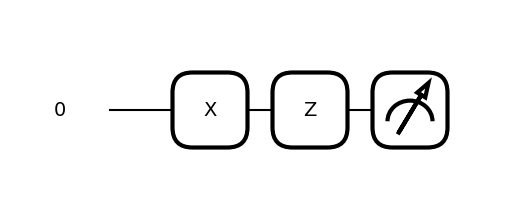

In [6]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def hadamard_circuit():
    qml.PauliX(wires=0)
    qml.PauliZ(wires = 0)
    return qml.state()

print(hadamard_circuit())

# Visualization of the quantum circuit,in format ASCII, using draw function
print(qml.draw(hadamard_circuit)())

# Visualization of the quantum circuit using matplotlib and draw_mpl function
import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(hadamard_circuit)()
plt.show()

**Measurements**

Let us suppose that  we  initially have a quantum system in the state |0⟩, then we apply two gates: a Pauli gate and a Hadamard gate.
\begin{equation}
\begin{split}
|0⟩ ── \fbox{X} ── \fbox{H} ── |\psi⟩ = α |0 \rangle +  \beta |1 ⟩?\\
\end{split}
\end{equation}

If we wish to know the probability of finding the state |0⟩, we need to find the value of $|α|^2$. Performing calculations

\begin{equation}
\begin{split}
|\psi \rangle &= HX|0⟩ = \frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1\\
                                         1 & -1
                          \end{bmatrix}
                          \begin{bmatrix}0 & 1\\
                                         1 & 0
                          \end{bmatrix}
                          \begin{bmatrix}1 \\
                                         0
                          \end{bmatrix}\\
|\psi \rangle  &= \frac{1}{\sqrt{2}}\begin{bmatrix}1 &1\\
                                         1 & -1
                          \end{bmatrix}
                          \begin{bmatrix}1 \\
                                         0
                          \end{bmatrix}\\
|\psi \rangle  &= \frac{1}{\sqrt{2}}\begin{bmatrix}1\\
                                         1
                          \end{bmatrix}\\
|\psi \rangle &=  \frac{1}{\sqrt{2}}\Big(|0\rangle+|1⟩\Big)
\end{split}
\end{equation}

From the last equation, we can identify that $\alpha= β = \frac{1}{\sqrt{2}}$. Then, the probability of finding the state $|0\rangle$ is:

\begin{equation}
|α|^2 = 1/2 = 0.5
\end{equation}

The probability of finding the 0-state is:  [0.5 0.5]


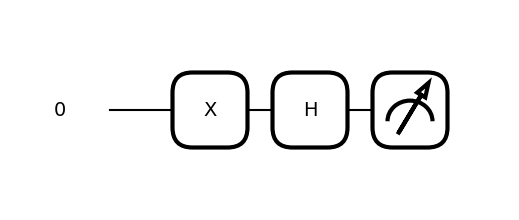

In [9]:
dev = qml.device('default.qubit', wires = 1)

@qml.qnode(dev)

#
def Prob():
  qml.PauliX(wires = 0)
  qml.Hadamard(wires = 0)
  return qml.probs()

result = Prob()
print('The probability of finding the 0-state is: ', result)

# Drawing our quantum circuit
import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(Prob)()
plt.show()

[0.+0.j 0.+0.j 0.+0.j 0.+1.j]


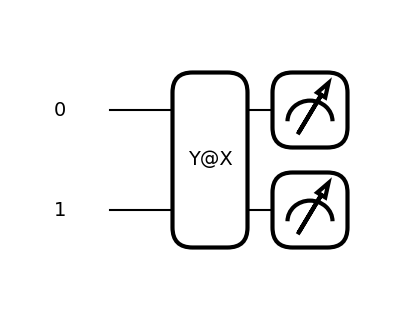

In [20]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit():
    qml.prod(qml.PauliY(wires=0)@qml.PauliX(wires=1))
    return qml.state()


result = circuit()
print(result)
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit)()
plt.show()